# 확률적 경사 하강법
- 참고 : 혼자서 공부하는 머신러닝 + 딥러닝

### 1. 데이터 불러오기

In [75]:
from sklearn import datasets
import numpy as np

breast_cancer_dataset = datasets.load_breast_cancer()

In [53]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
breast_cancer_input, breast_cancer_target = breast_cancer_dataset.data, breast_cancer_dataset.target

In [55]:
breast_cancer_input.shape, breast_cancer_target.shape

((569, 30), (569,))

In [56]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    breast_cancer_input, breast_cancer_target, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 2. SGDclassifier 분석

In [58]:
from sklearn.linear_model import SGDClassifier

In [87]:
sc = SGDClassifier(loss='log_loss', max_iter=10)
sc.fit(train_scaled, train_target)
# 모델이 춤분히 수렴하지 않았다는 경고 메세지를 띄움. max_iter의 수를 더 늘려줘야함

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9741784037558685
0.9790209790209791


c:\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [88]:
sc.partial_fit(train_scaled, train_target) #점진적인 훈련 가능. 1에포크씩 이어서 훈련 가능.

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9835680751173709
0.958041958041958


# 에포크와 과대/과소 적합

In [80]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [81]:
for _ in range(0, 200):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [89]:
classes

array([0, 1])

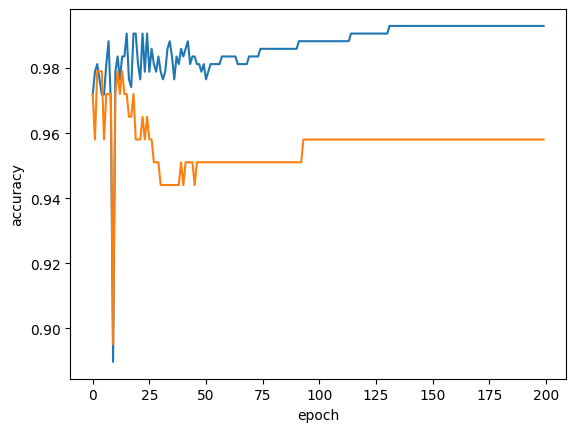

In [82]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [86]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9882629107981221
0.965034965034965
